In [1]:
import numpy as np
import os
from nilearn.plotting import plot_glass_brain
from nilearn.plotting import plot_stat_map
from nilearn.datasets import load_mni152_brain_mask
import nibabel as nib
import cv2 as cv
from nilearn.input_data import NiftiMasker
import nilearn.image as image
from nilearn import plotting
mask_img = load_mni152_brain_mask()
AAL = image.load_img('C:\\Users\\Yin/nilearn_data\\aal_SPM12\\aal\\ROI_MNI_V4.nii')
AALatlas = np.load("C:\\Users\Yin\Desktop\ADHD200\AALatlas.npy")
AALlabelsAb = np.load("C:\\Users\Yin\Desktop\ADHD200\AALlabelsAb.npy")
AALlabelsFu = np.load("C:\\Users\Yin\Desktop\ADHD200\AALlabelsFu.npy")
import matplotlib.pyplot as plt
AAL = nib.Nifti1Image(AALatlas>0, AAL.affine, AAL.header)
from nilearn import datasets

atlas_data = datasets.fetch_atlas_msdl()
atlas_filename = atlas_data.maps
DMN = nib.load(atlas_filename)
DMNlabels = atlas_data.labels

c:\users\yin\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [2]:
root = "C:\\Users\Yin\Desktop\ADHD200\Recon"
Mnames= os.listdir(root)
Mdirc = []
for i in range(len(Mnames)):
    path = os.path.join(root, Mnames[i])
    Mdirc.append(path)

In [3]:
def barregionshow(stem):
    groups_len = len(stem)
    fig, ax = plt.subplots()
    index = np.arange(groups_len)
    opacity = 0.4
    bar_width = 0.8
    rects1 = ax.bar(index, stem,bar_width,
                alpha=opacity, color='b',
                label="AALlabelsAb")
    ax.set_xlabel('Brain Regions in AAL')
    ax.set_ylabel('Numbers')

    ax.set_title('Statistical of Active Region')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(AALlabelsAb[1:])
    ax.legend()
    ax.legend()
    fig.tight_layout()
    plt.show()

In [4]:
def segform(data):
    x, y, z = data.shape
    segdata = np.zeros(data.shape)
    statistic = np.zeros(data.max())
    for i in range(x):
        for j in range(y):
            for k in range(z):
                if data[i,j,k] >0:
                    statistic[data[i,j,k]-1] = statistic[data[i,j,k]-1] + 1
    
    return statistic

In [5]:
def smooth(data):
    masker = NiftiMasker(mask_img = AAL, smoothing_fwhm=8,memory='nilearn_cache', memory_level=1)
    masker = masker.fit()
    data2d = masker.transform(data)
    Snewbrain = masker.inverse_transform(data2d)
    return Snewbrain

In [6]:
def getnp(dirc):
    ni = nib.load(dirc)
    nidata = ni.get_fdata()
    return nidata

In [7]:
Mdirc

['C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0010042.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0010064.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0010128.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0021019.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0023008.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0023012.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027011.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027018.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027034.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027037.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1019436.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1206380.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1418396.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1517058.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1552181.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1562298.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1679142.nii',
 'C:\\Users\\Yin\\Desktop\\ADHD

In [8]:
s2014113 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\2014113.nii',
            'age':10,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap2014113_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3902469 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3902469.nii',
            'age':10,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3902469_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s4275075 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\4275075.nii',
            'age':10,
            'sex':'f',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap4275075_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s7774305 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\7774305.nii',
            'age':11,
            'sex':'f',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap7774305_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s1019436 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1019436.nii',
            'age':12,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap1019436_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3699991 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3699991.nii',
            'age':12,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3699991_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3154996 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3154996.nii',
            'age':11,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3154996_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3884955 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3884955.nii',
            'age':12,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3884955_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s0027034 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027034.nii',
            'age':13,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0027034_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s4134561 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\4134561.nii',
            'age':15,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap4134561_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s0027018 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027018.nii',
            'age':19,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0027018_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s6115230 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\6115230.nii',
            'age':19,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap6115230_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s0027037 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027037.nii',
            'age':18,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0027037_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s8409791 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\8409791.nii',
            'age':17,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap8409791_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}

In [9]:
s0027011 =  {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0027011.nii',
            'age':21,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0027011_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3007585 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3007585.nii',
            'age':19,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3007585_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s8697774 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\8697774.nii',
            'age':10,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap8697774_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s9750701 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\9750701.nii',
            'age':11,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap9750701_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s0010064 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0010064.nii',
            'age':16,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0010064_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s0021019 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0021019.nii',
            'age':15,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0021019_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s0010042 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0010042.nii',
            'age':10,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0010042_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s0010128 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0010128.nii',
            'age':9,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0010128_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s2497695 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\2497695.nii',
            'age':11,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap2497695_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s4164316 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\4164316.nii',
            'age':10,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap4164316_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s1552181 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1552181.nii',
            'age':10,
            'sex':'f',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap1552181_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s4046678 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\4046678.nii',
            'age':8,
            'sex':'f',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap4046678_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s0023012 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0023012.nii',
            'age':11,
            'sex':'f',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0023012_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s1679142 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1679142.nii',
            'age':11,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap1679142_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s1206380 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1206380.nii',
            'age':9,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap1206380_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}


In [10]:
s0023008 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\0023008.nii',
            'age':9,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap0023008_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s4016887 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\4016887.nii',
            'age':9,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap4016887_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s1418396 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1418396.nii',
            'age':8,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap1418396_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s2950754 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\2950754.nii',
            'age':13,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap2950754_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3994098 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3994098.nii',
            'age':13,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3994098_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3520880 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3520880.nii',
            'age':10,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3520880_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s1517058 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1517058.nii',
            'age':10,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap1517058_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s9744150 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\9744150.nii',
            'age':9,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap9744150_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s1562298 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\1562298.nii',
            'age':9,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap1562298_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3205761 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3205761.nii',
            'age':14,
            'sex':'m',
            'adhd':1,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3205761_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}
s3624598 = {'fdir':'C:\\Users\\Yin\\Desktop\\ADHD200\\Recon\\3624598.nii',
            'age':14,
            'sex':'m',
            'adhd':0,
            'idir':'C:\\Users\Yin\Desktop\ADHD200\Gush\GushOfstasMap3624598_rest_tshift_RPI_voreg_mni.nii.gz.npy',
            'extra':0}


In [ ]:
,s3624598 lost s8697774 lost s3520880

In [11]:
subjects = [s2014113,s3902469,s4275075,s7774305,s1019436,s3699991,s3154996,s3884955,s0027034,s4134561,s0027018,s6115230,s0027037,s8409791,s0027011,s3007585,s9750701,s0010064,s0021019,s0010042,s0010128,s2497695,s4164316,s1552181,s4046678,s0023012,s1679142,s1206380,s0023008,s4016887,s1418396,s2950754,s3994098,s1517058,s9744150,s1562298,s3205761]

In [12]:
PP = []
NP = []
for i in range(0,len(subjects)):
    flag = subjects[i]['adhd']
    if flag == 1:
        PP.append(subjects[i])
    else:
        NP.append(subjects[i])

In [13]:
PPu15 = []
PPd15 = []
for i in range(0,len(PP)):
    flag = PP[i]['age']
    if flag < 15:
        PPd15.append(PP[i])
    else:
        PPu15.append(PP[i])

In [14]:
test = getnp(PPu15[1]['fdir'])

In [15]:
test.shape

(91, 109, 91)

In [16]:
NPu15 = []
NPd15 = []
for i in range(0,len(NP)):
    flag = NP[i]['age']
    if flag < 15:
        NPd15.append(NP[i])
    else:
        NPu15.append(NP[i])

In [17]:
def getaveragenii(dirc):
    Av = np.zeros(91*109*91)
    Av = Av.reshape(91,109,91)
    for i in range(len(dirc)):
        nidata = getnp(dirc[i]['fdir'])
        nidata = nidata/nidata.max()
        Av = Av + nidata
    Av = Av/(len(dirc))
    Avmap = nib.Nifti1Image(Av, AAL.affine, AAL.header)
    Avmap = smooth(Avmap)
    return Avmap

In [18]:
NormalUp16 = getaveragenii(NPu15)
plot_glass_brain(NormalUp16, output_file='NormalUp16Glass.png')
plot_stat_map(NormalUp16, threshold=0.015,output_file='NormalUp16S.png')
plot_stat_map(NormalUp16, display_mode='z', cut_coords=10,threshold=0.015,output_file='NormalUp16S2.png')
plot_stat_map(NormalUp16, display_mode='x', cut_coords=10,threshold=0.015,output_file='NormalUp16S3.png')

In [19]:
NormalDown16 = getaveragenii(NPd15)
plot_glass_brain(NormalDown16,output_file='NormalDown16Glass.png')
plot_stat_map(NormalDown16, threshold=0.015,output_file='NormalDown16S.png')
plot_stat_map(NormalDown16, display_mode='z', cut_coords=10,threshold=0.015,output_file='NormalDown16S2.png')
plot_stat_map(NormalDown16, display_mode='x', cut_coords=10,threshold=0.015,output_file='NormalDown16S3.png')

In [22]:
ADHDDown16 = getaveragenii(PPd15)
plot_glass_brain(ADHDDown16,output_file='ADHDDown16Glass.png')
plot_stat_map(ADHDDown16, threshold=0.015,output_file='ADHDDown16S.png')
plot_stat_map(ADHDDown16, display_mode='z', cut_coords=10,threshold=0.015,output_file='ADHDDown16S2.png')
plot_stat_map(ADHDDown16, display_mode='x', cut_coords=10,threshold=0.015,output_file='ADHDDown16S3.png')

In [24]:
ADHDUp16 = getaveragenii(PPu15)
plot_glass_brain(ADHDUp16,output_file='ADHDUp16Glass.png')
plot_stat_map(ADHDUp16, threshold=0.015,output_file='ADHDUp16S.png')
plot_stat_map(ADHDUp16, display_mode='z', cut_coords=10,threshold=0.015,output_file='ADHDUp16S2.png')
plot_stat_map(ADHDUp16, display_mode='x', cut_coords=10,threshold=0.015,output_file='ADHDUp16S3.png')

In [58]:
plot_stat_map(ADHDUp16,threshold=0.014, display_mode='ortho', cut_coords=[0, -70, 69],output_file='ADHDUp16.png')

In [59]:
plot_stat_map(ADHDDown16,threshold=0.014, display_mode='ortho', cut_coords=[0, -70, 69],output_file='ADHDDown16.png')

In [60]:
plot_stat_map(NormalDown16,threshold=0.014, display_mode='ortho', cut_coords=[0, -70, 69],output_file='NormalDown16.png')

In [61]:
plot_stat_map(NormalUp16,threshold=0.014, display_mode='ortho', cut_coords=[0, -70, 69],output_file='NormalUp16.png')

In [9]:
for i in range(len(Mdirc)):
    nidata = getnp(Mdirc[i])
    #AvmapDataMask = nidata < 0.07
    nidata = nidata/nidata.max()
    #AvmapDataMask =  nidata < 0.2
    #nidata = nidata*AvmapDataMask
    Av14 = Av14 + nidata
Av14 = Av14/(len(Mdirc))

In [10]:
for i in range(len(Mdirc)):
    nidata = getnp(Mdirc[i])
    #AvmapDataMask = nidata < 0.07
    nidata = nidata/nidata.max()
    AvmapDataMask =  nidata < 0.2
    nidata = nidata*AvmapDataMask
    Av14 = Av14 + nidata
Av14 = Av14/(len(Mdirc))

In [89]:
Av14 = np.zeros(91*109*91)
Av14 = Av14.reshape(91,109,91)

In [90]:
for i in range(len(Mdirc)):
    nidata = getnp(Mdirc[i])
    #AvmapDataMask = nidata < 0.07
    nidata = nidata/nidata.max()
    #AvmapDataMask =  nidata < 0.16
    #nidata = nidata*AvmapDataMask
    Av14 = Av14 + nidata
Av14 = Av14/(len(Mdirc))
#Av14 = Av14/Av14.max()


In [91]:
Av14.max()

0.6300297759383744

In [92]:
Avmap = nib.Nifti1Image(Av14, AAL.affine, AAL.header)
Avmap = smooth(Avmap)

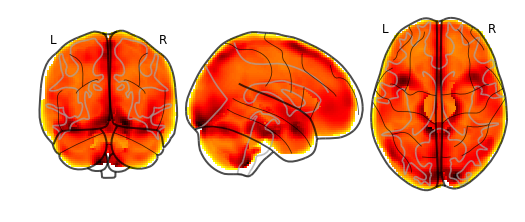

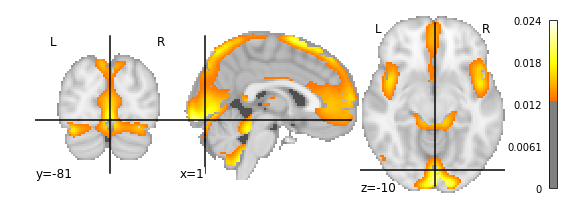

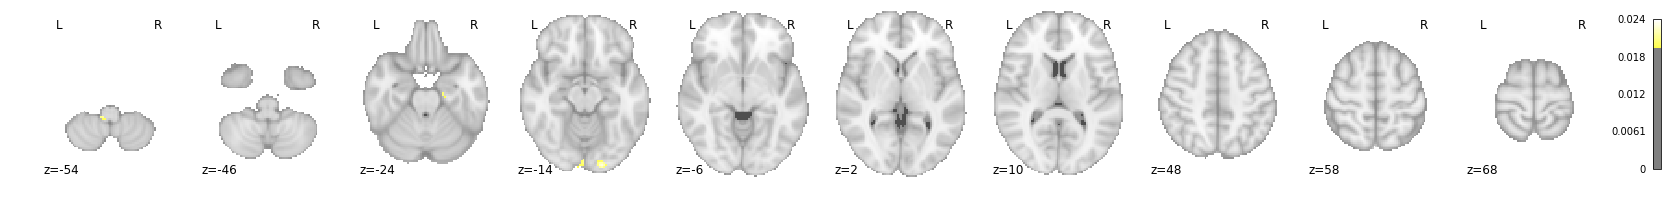

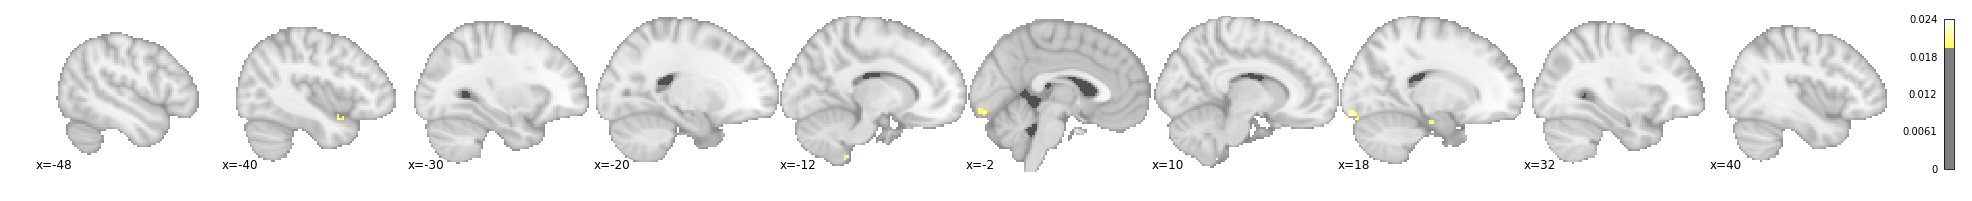

In [97]:
plot_glass_brain(Avmap)
plot_stat_map(Avmap, threshold=0.013)
plot_stat_map(Avmap, display_mode='z', cut_coords=10,threshold=0.02)
plot_stat_map(Avmap, display_mode='x', cut_coords=10,threshold=0.02)

In [90]:
def stasregion(data, thre,h):
    AvmapData = data.get_fdata()
    AvmapData = AvmapData[:,:,:,0]
    AvmapDataMask = h> AvmapData > thre
    maskatlas = AALatlas*AvmapDataMask
    stem = segform(maskatlas)
    return stem

In [91]:
s = stasregion(Avmap, 0.00015, )
barregionshow(s)

TypeError: stasregion() missing 1 required positional argument: 'h'

In [92]:
for i in range(len(s)):
    print(AALlabelsAb[i],"short for ",AALlabelsFu[i]," have ",s[i])

NameError: name 's' is not defined

In [104]:
atlas_data

{'description': b"MSDL atlas\n\n\nNotes\n-----\nResult maps of sparse dictionary learning based on resting-state data.\n\nThis can be understand as a variant of ICA based on the assumption\nof sparsity rather than independence.\n\n\nContent\n-------\n    :'maps': Nifti images with the (probabilistic) region definitions\n    :'labels': CSV file specifying the label information\n\n\nReferences\n----------\nFor more information about this dataset's structure:\nhttps://team.inria.fr/parietal/18-2/spatial_patterns/spatial-patterns-in-resting-state/\n\nMulti-subject dictionary learning to segment an atlas of brain spontaneous activity Gael Varoquaux, Alexandre Gramfort, Fabian Pedregosa, Vincent Michel, Bertrand Thirion Information Processing in Medical Imaging, 2011, pp. 562-573, Lecture Notes in Computer Science\n\nLearning and comparing functional connectomes across subjects. Gael Varoquaux, R.C. Craddock NeuroImage, 2013\n\nLicence: usage is unrestricted for non-commercial research purpo

c:\users\yin\appdata\local\programs\python\python36\lib\site-packages\numpy\ma\core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


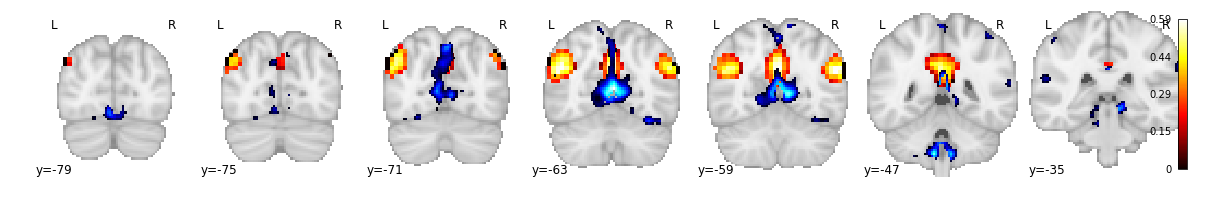

In [43]:
display = plot_stat_map(image.index_img(DMN, 4),display_mode='y', cut_coords=7,)
display.add_overlay(image.index_img(atlas_filename, 5),
                    cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(atlas_filename, 6),
                    cmap=plotting.cm.black_red)
display.add_overlay(image.index_img(atlas_filename, 3),
                    cmap=plotting.cm.black_red)
display.add_overlay(Avmap, threshold=0.012,cmap = plotting.cm.black_blue)
display.add_overlay(image.index_img(atlas_filename, 1), cmap = plotting.cm.black_green)
display.add_overlay(image.index_img(atlas_filename, 0), cmap = plotting.cm.black_green)

c:\users\yin\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


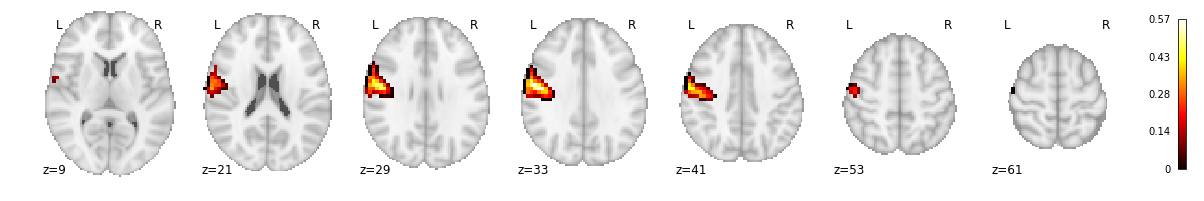

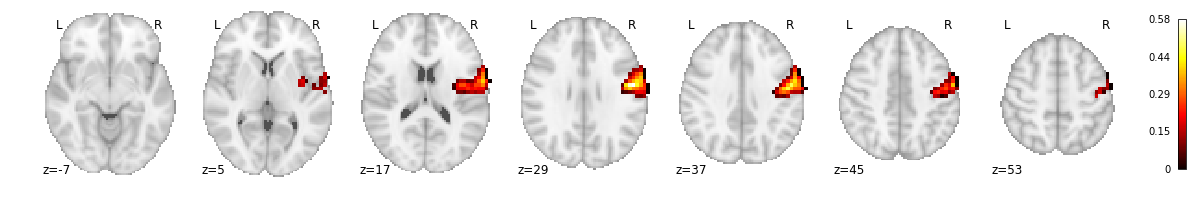

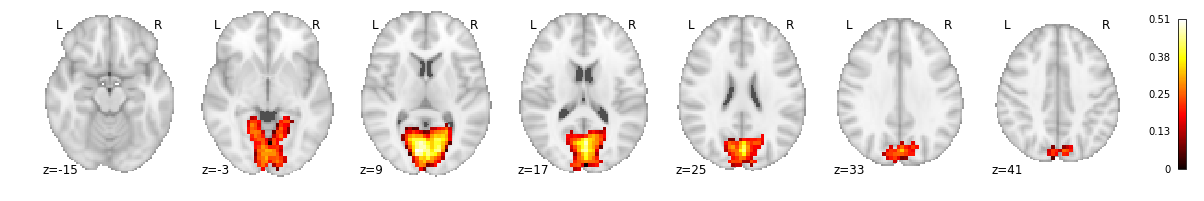

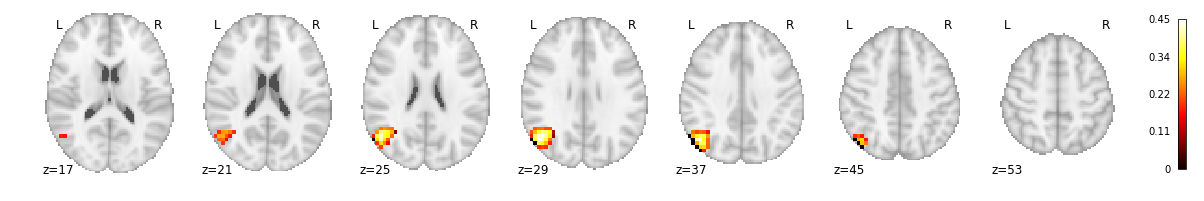

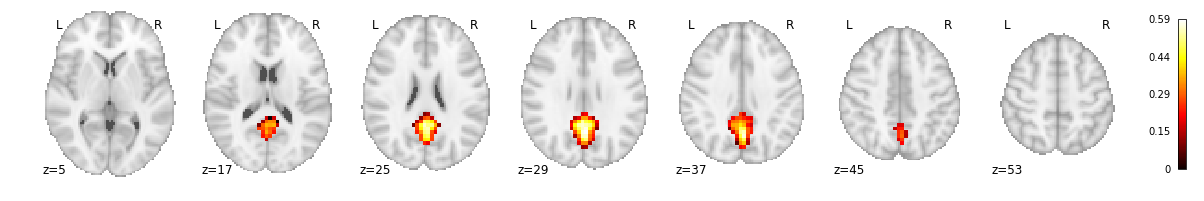

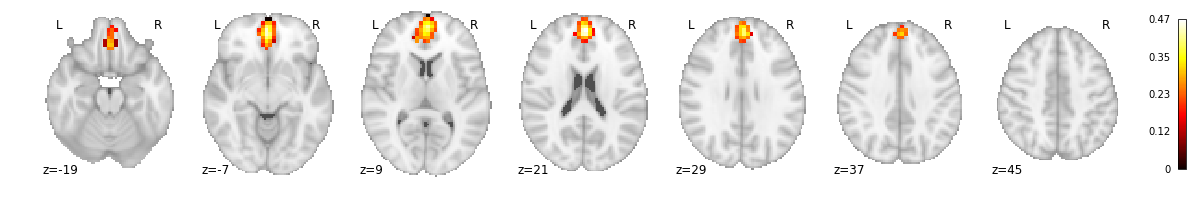

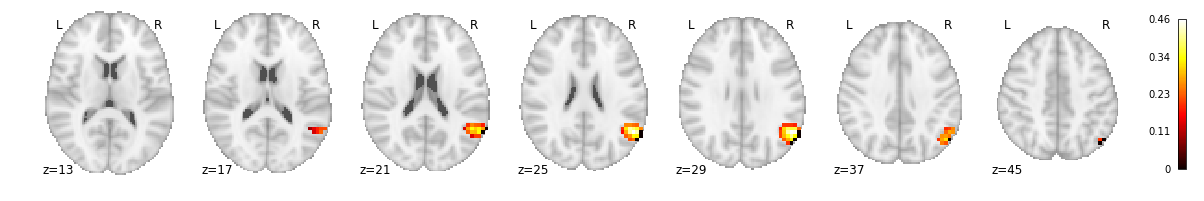

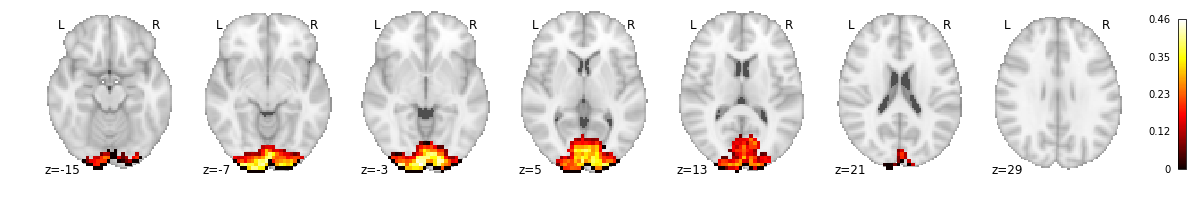

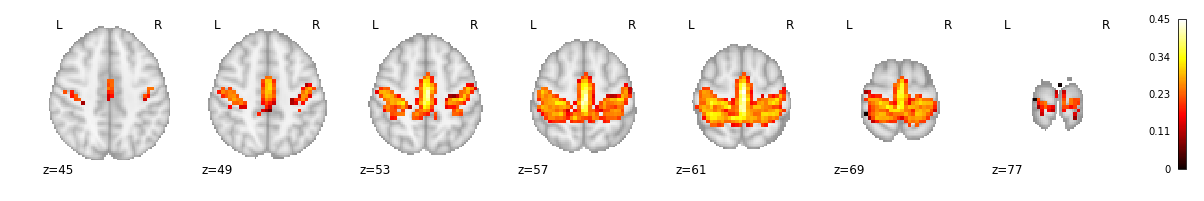

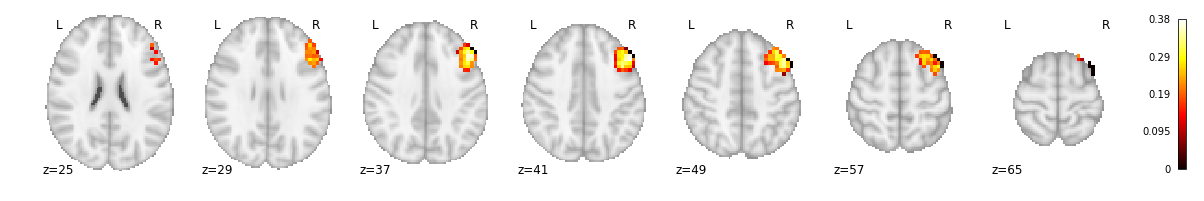

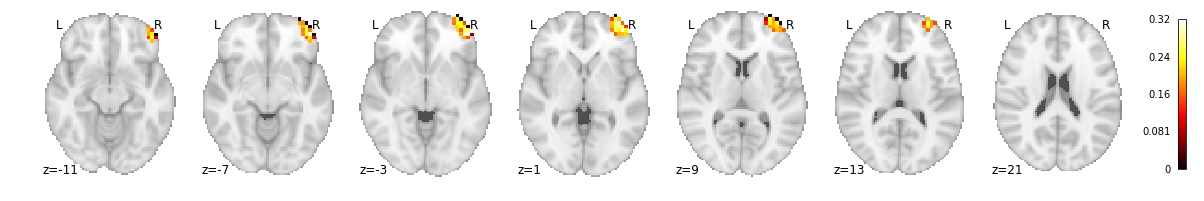

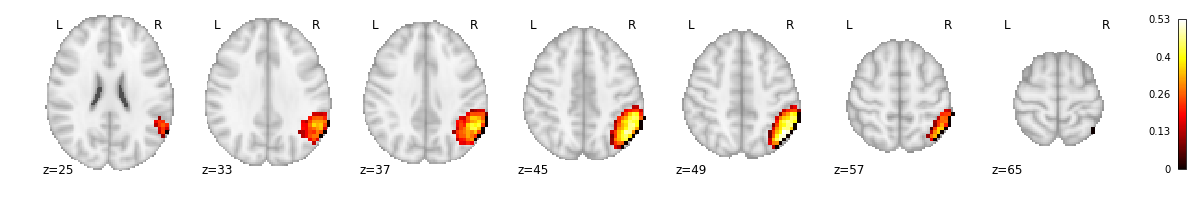

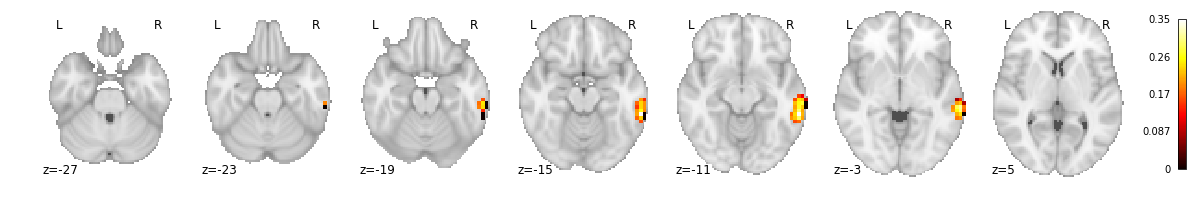

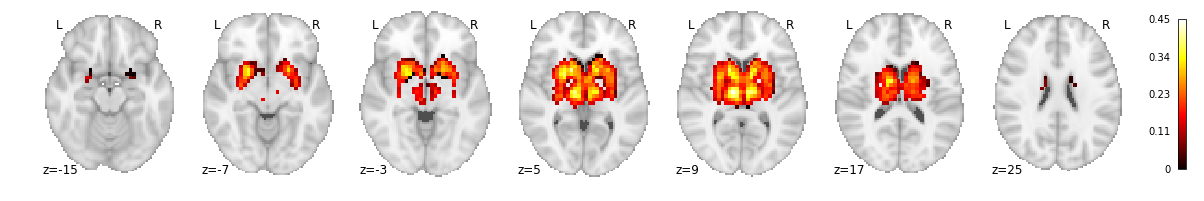

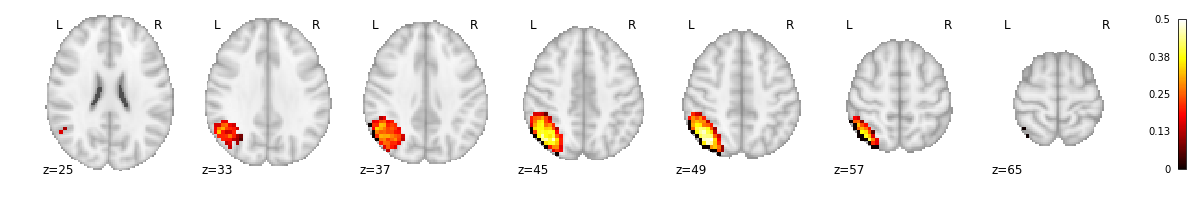

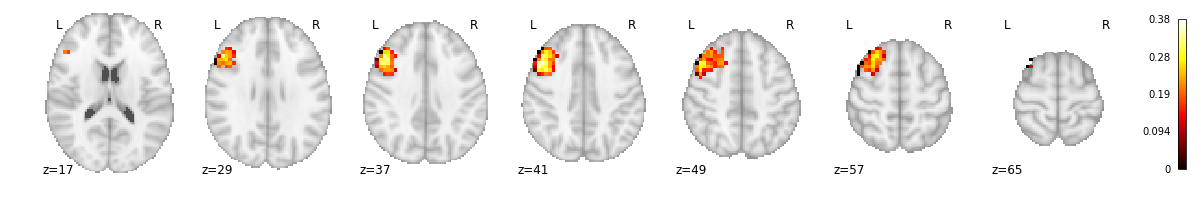

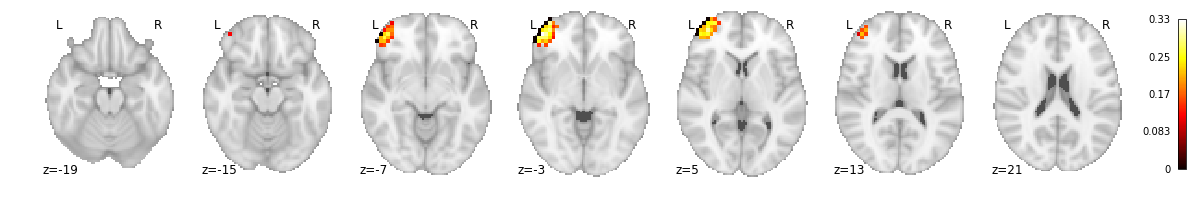

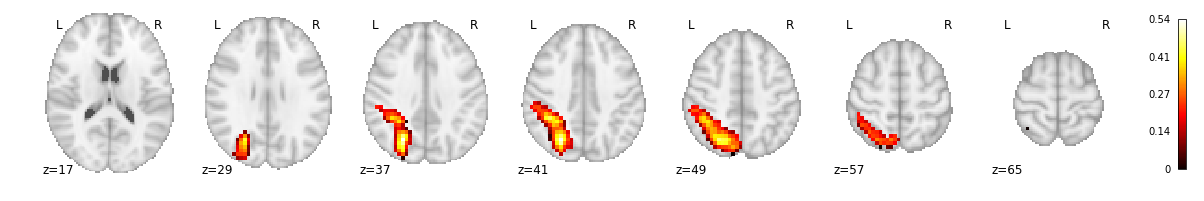

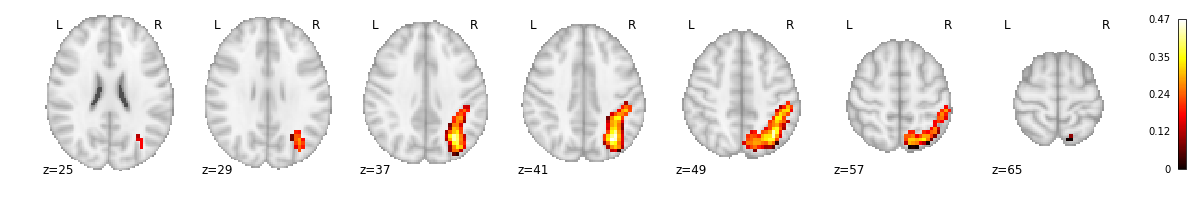

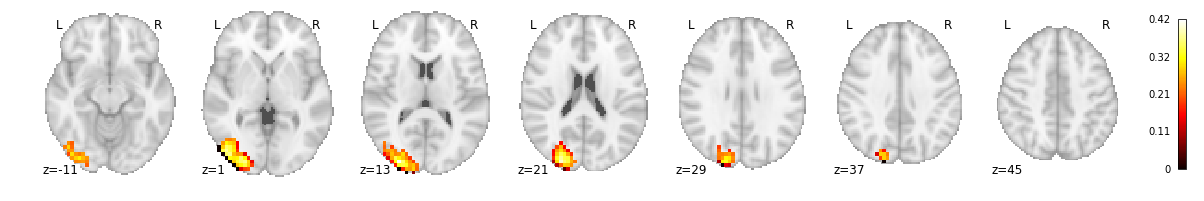

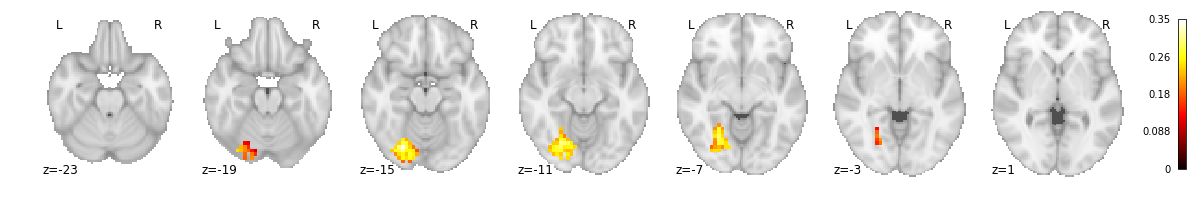

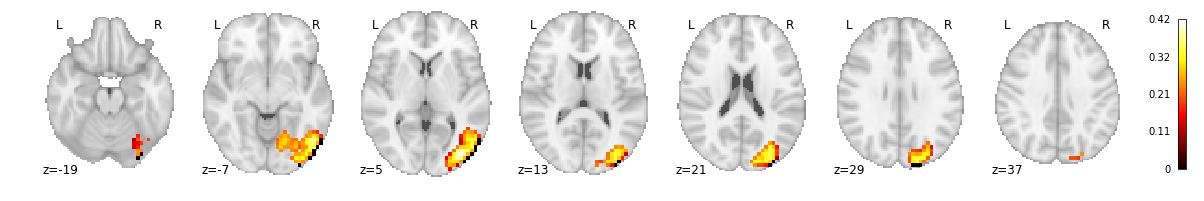

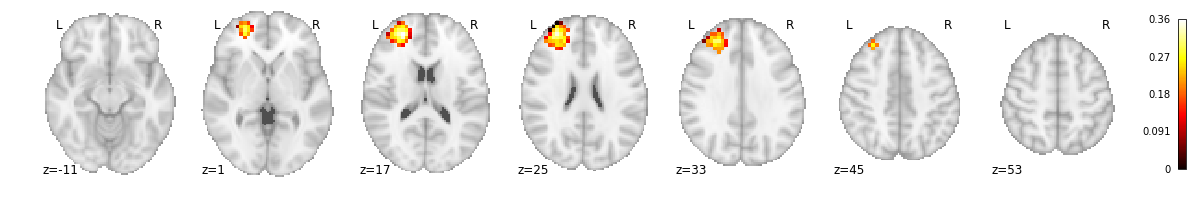

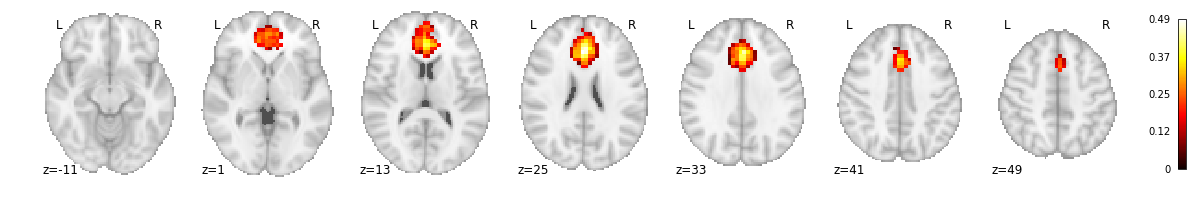

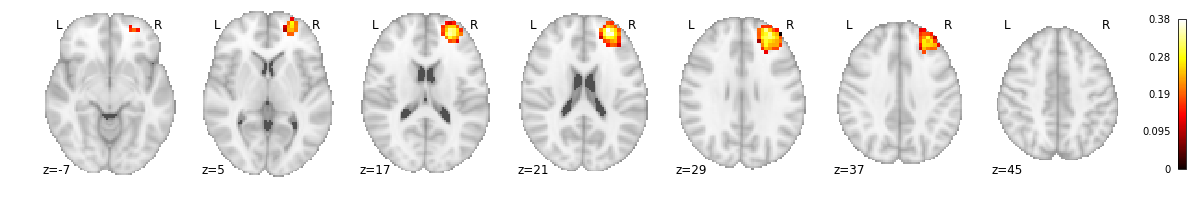

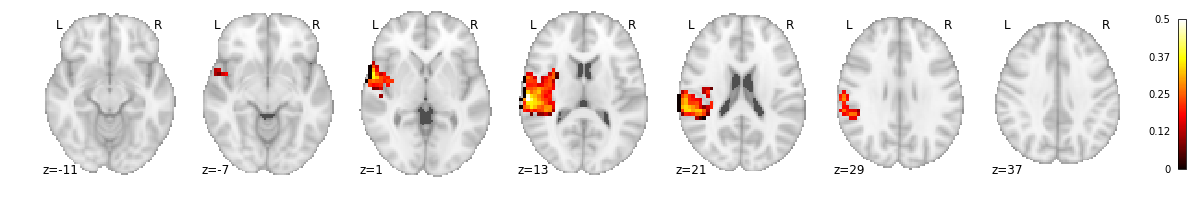

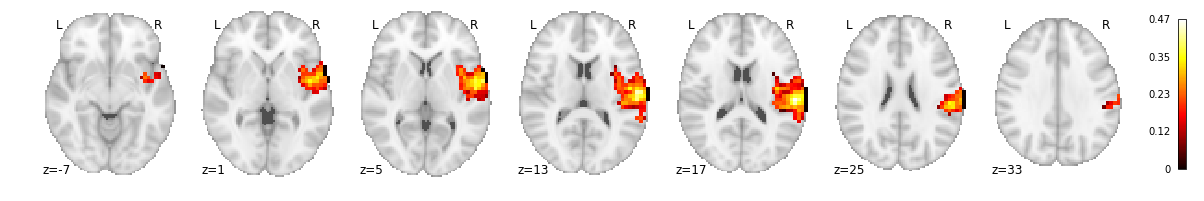

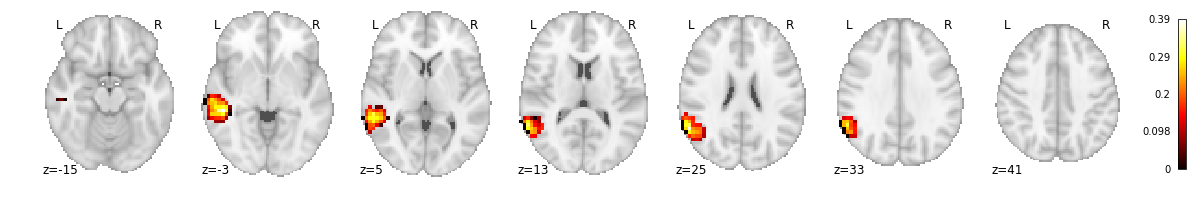

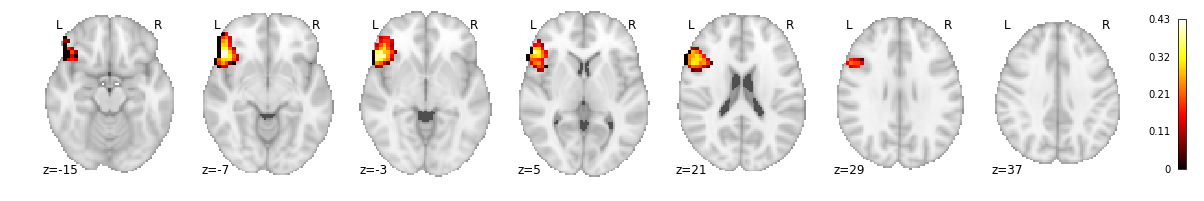

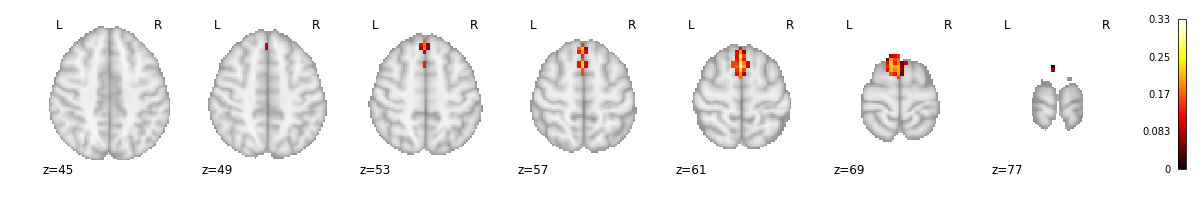

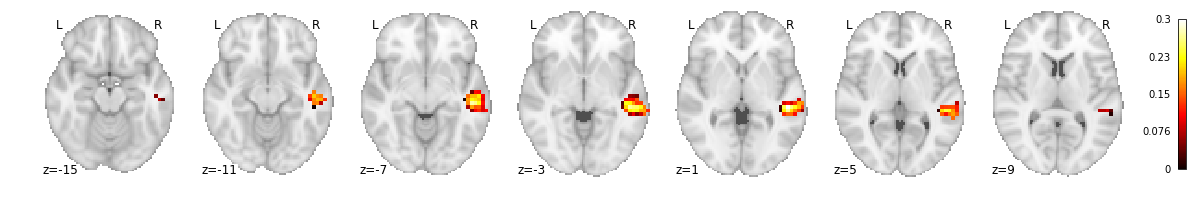

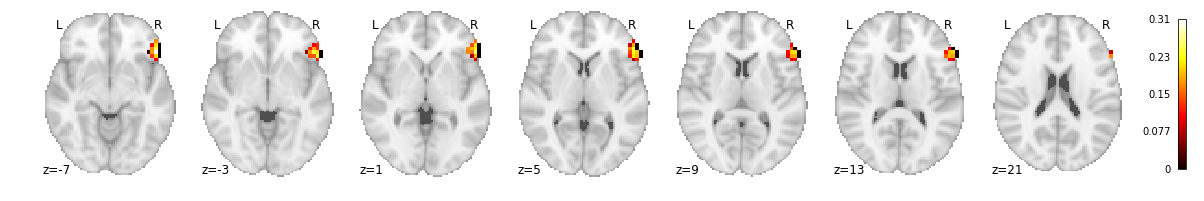

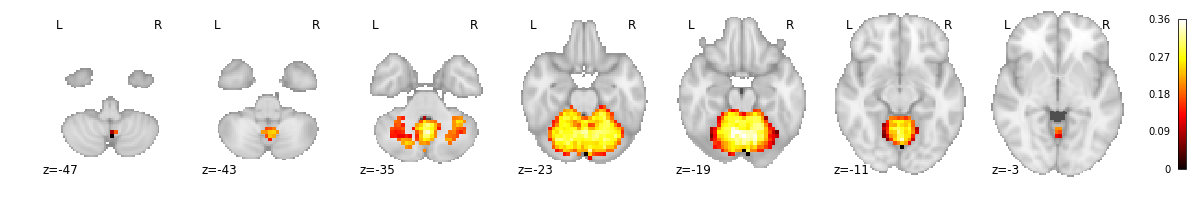

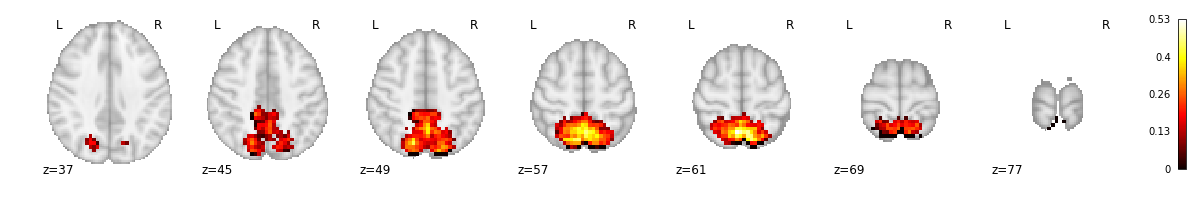

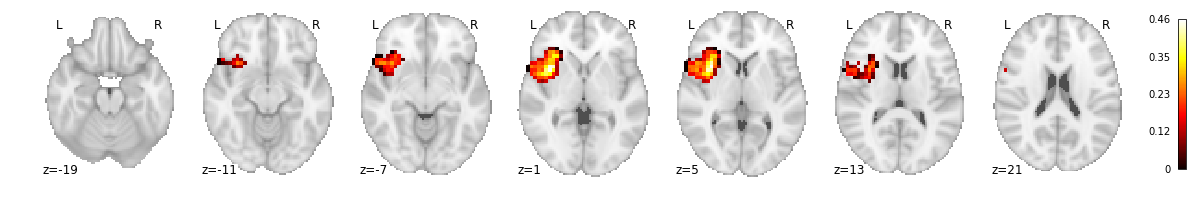

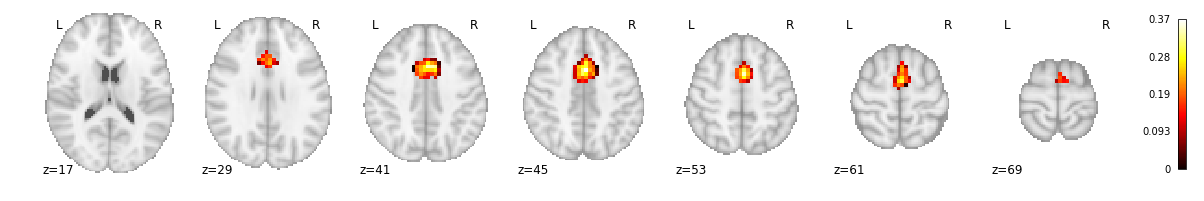

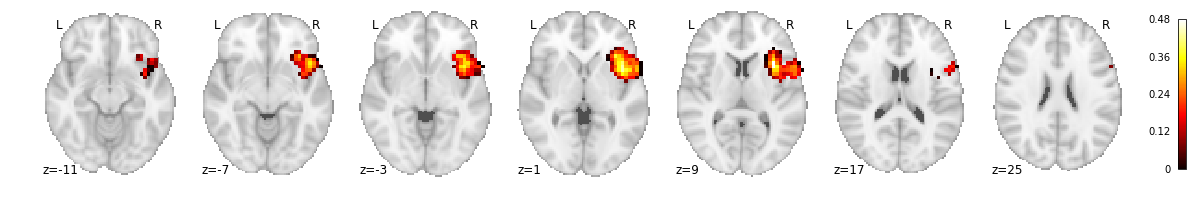

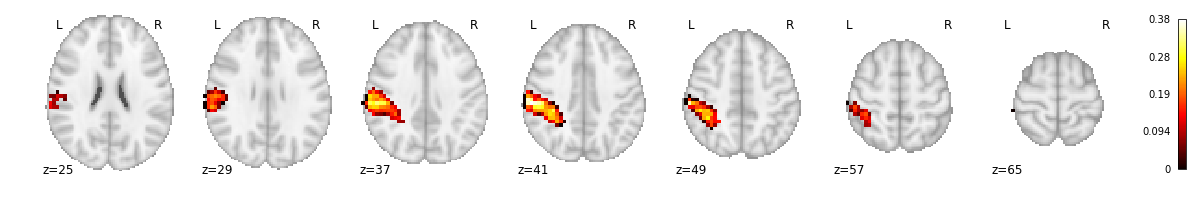

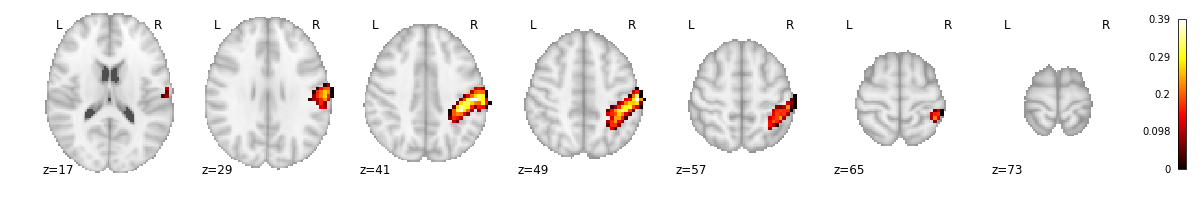

In [109]:
for i in range(39):
    display = plot_stat_map(image.index_img(DMN, i),display_mode='z')

In [10]:
root = "C:\\Users\Yin\Desktop\ADHD200\Recon2"
Mnames= os.listdir(root)
Mdirc = []
for i in range(len(Mnames)):
    path = os.path.join(root, Mnames[i])
    Mdirc.append(path)

In [13]:
Av14 = np.zeros(91*109*91)
Av14 = Av14.reshape(91,109,91)

In [14]:
for i in range(len(Mdirc)):
    nidata = getnp(Mdirc[i])
    Av14 = Av14 + nidata
Av14 = Av14/(len(Mdirc))

In [15]:
Avmap = nib.Nifti1Image(Av14, AAL.affine, AAL.header)
Avmap = smooth(Avmap)

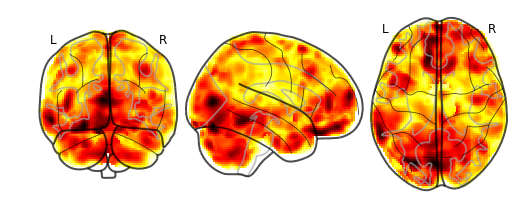

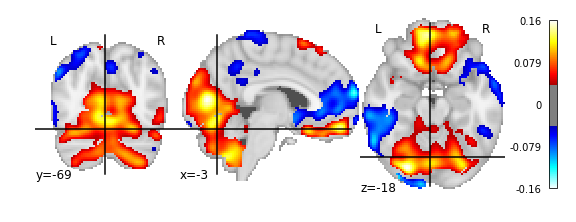

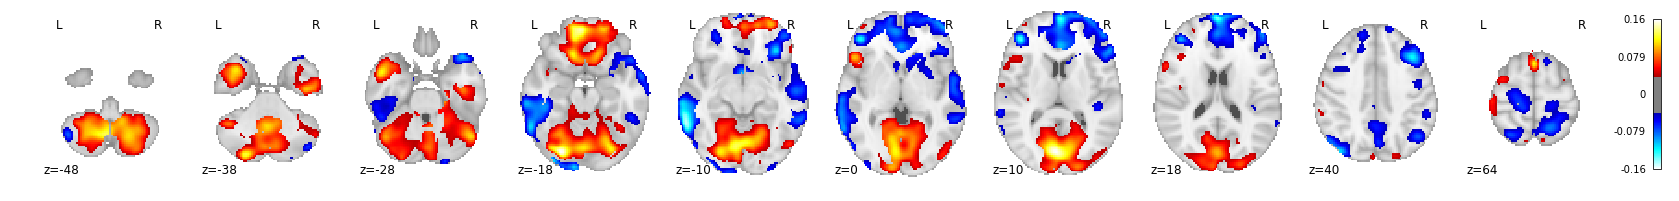

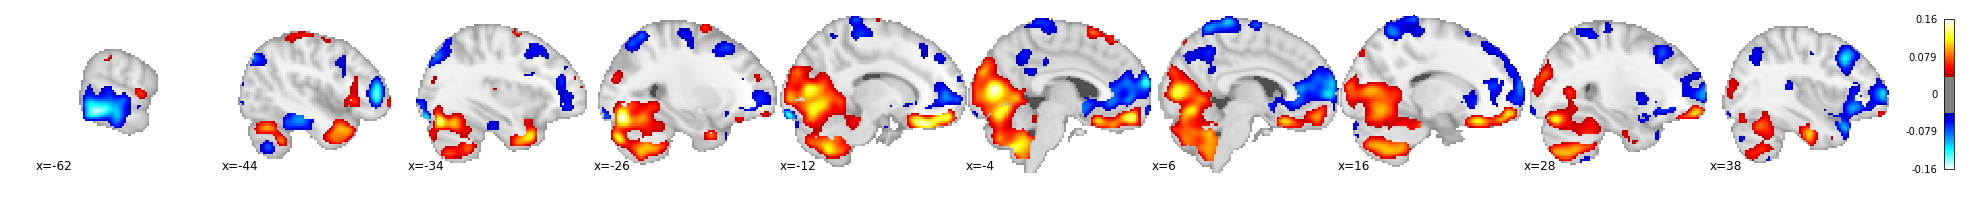

In [25]:
plot_glass_brain(Avmap)
plot_stat_map(Avmap, threshold=0.04)
plot_stat_map(Avmap, display_mode='z', cut_coords=10, threshold=0.04)
plot_stat_map(Avmap, display_mode='x', cut_coords=10, threshold=0.04)

c:\users\yin\appdata\local\programs\python\python36\lib\site-packages\numpy\ma\core.py:2784: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


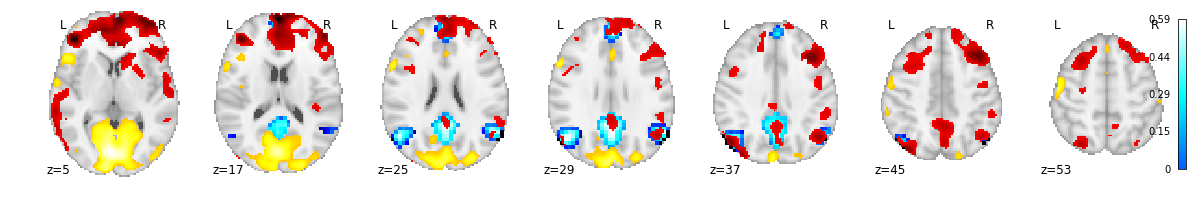

In [37]:
display = plot_stat_map(image.index_img(DMN, 4),display_mode='z', cut_coords=7,cmap = plotting.cm.black_blue)
display.add_overlay(image.index_img(atlas_filename, 5),
                    cmap=plotting.cm.black_blue)
display.add_overlay(image.index_img(atlas_filename, 6),
                    cmap=plotting.cm.black_blue)
display.add_overlay(image.index_img(atlas_filename, 3),
                    cmap=plotting.cm.black_blue)
display.add_overlay(Avmap, threshold=0.04,cmap = plotting.cm.black_red)
#display.add_overlay(image.index_img(atlas_filename, 23), threshold=0.03,cmap = plotting.cm.black_green)